<a href="https://colab.research.google.com/github/sakshisinghal936/Adult_Income_Classification/blob/main/Adult_Income_Dataset(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Data

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! kaggle datasets download -d mosapabdelghany/adult-income-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/mosapabdelghany/adult-income-prediction-dataset
License(s): CC0-1.0
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 710MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/adult-income-prediction-dataset.zip',  'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
df = pd.read_csv("/content/adult.csv")

# Data Understanding

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.shape

(32561, 15)

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [ ]:
df.nunique()

,0
age,73
workclass,9
fnlwgt,21648
education,16
education.num,16
marital.status,7
occupation,15
relationship,6
race,5
sex,2


<Axes: xlabel='income'>

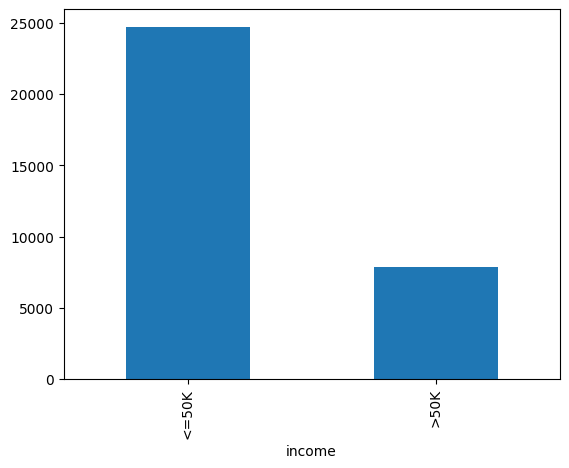

In [ ]:
df["income"].value_counts().plot(kind = "bar")

In [ ]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
(df == '?').sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


In [ ]:
df = df.replace("?", None)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,None,77053,HS-grad,9,Widowed,None,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,None,186061,Some-college,10,Widowed,None,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.isna().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


In [ ]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


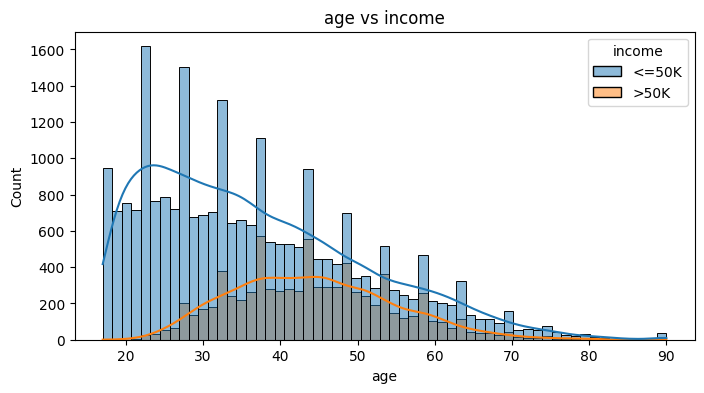

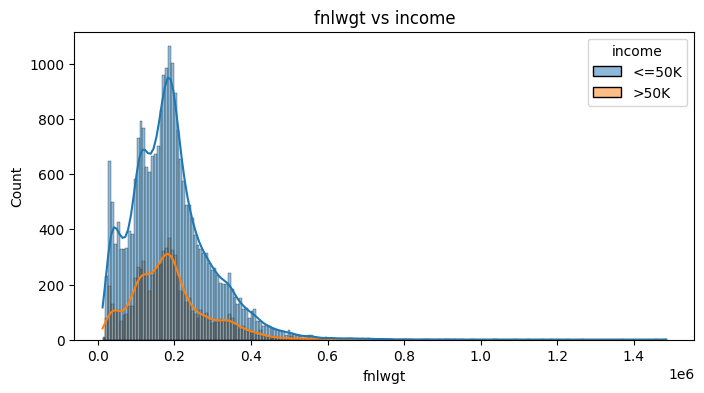

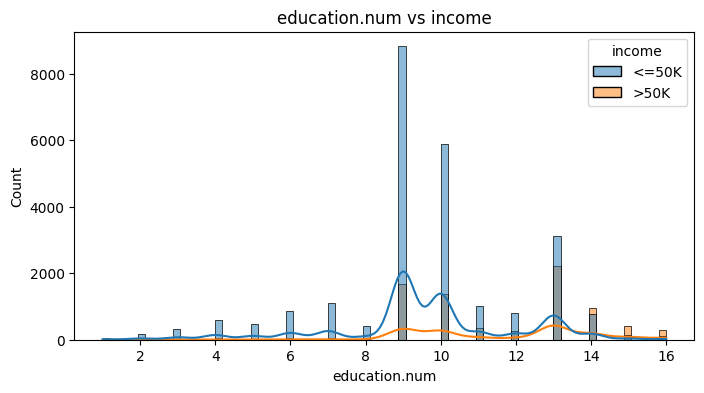

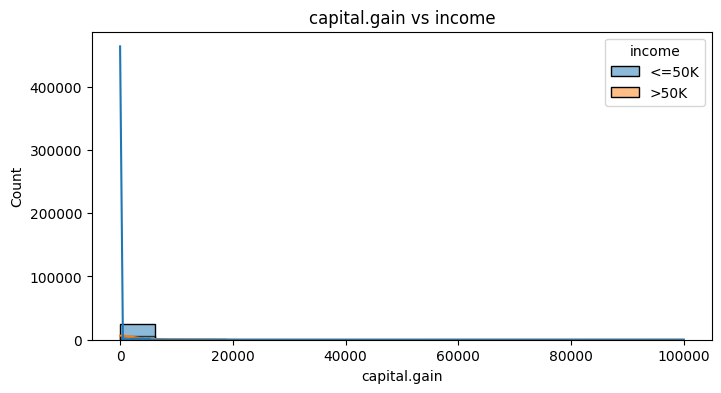

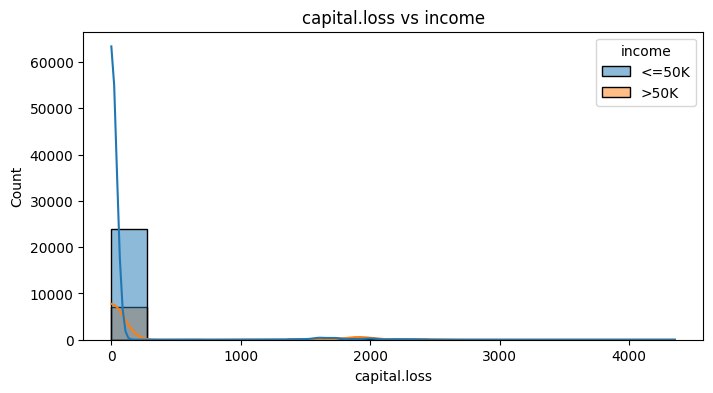

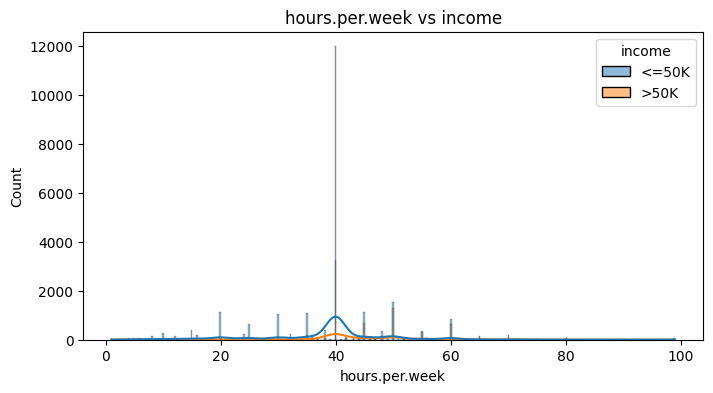

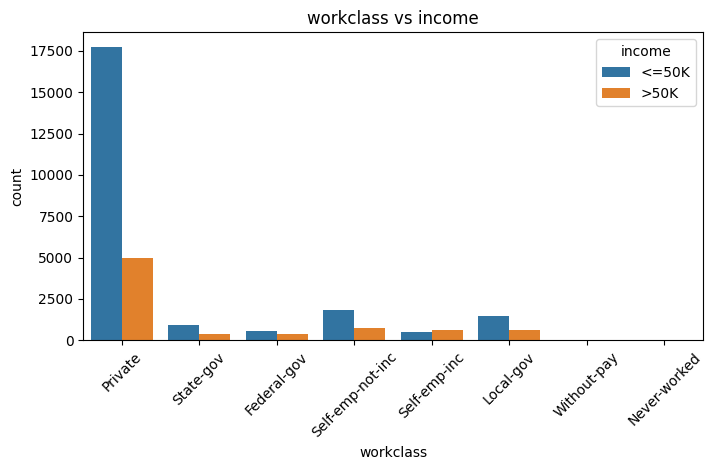

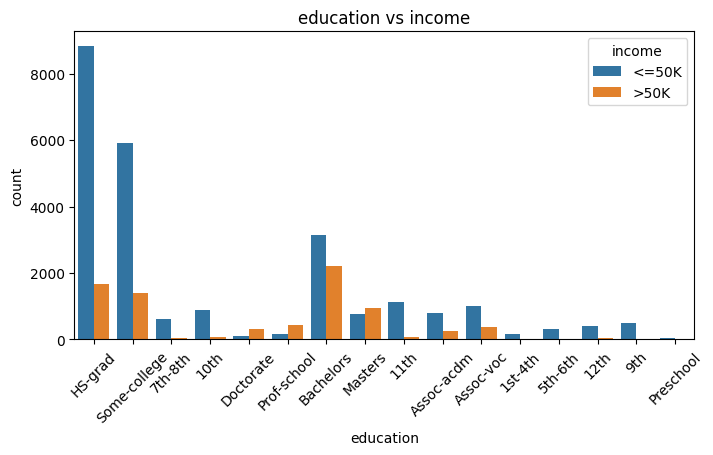

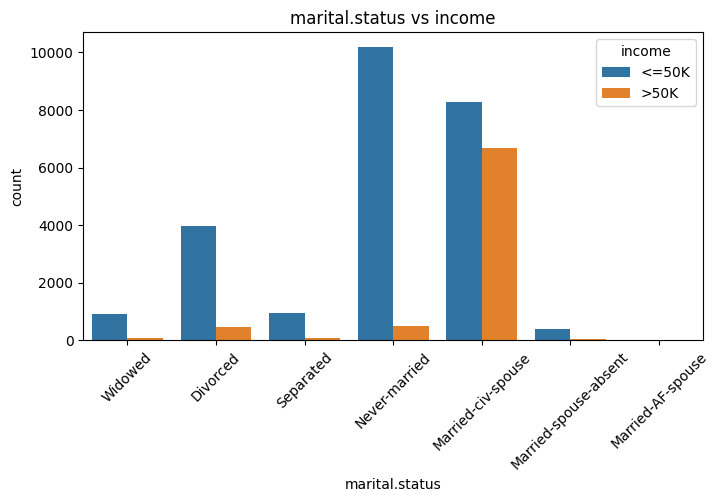

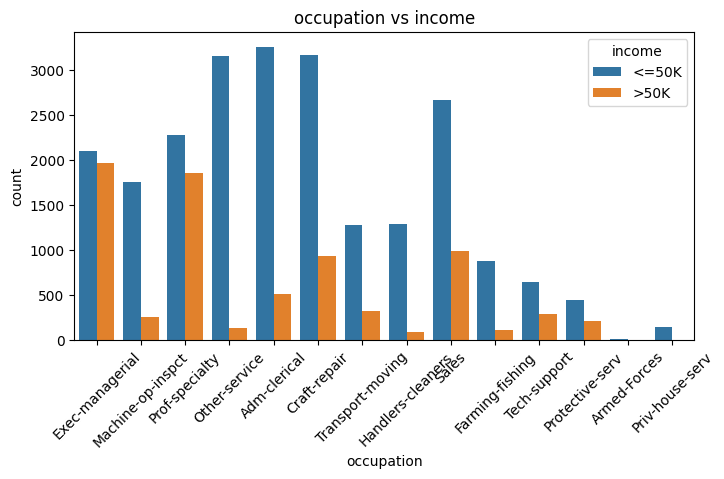

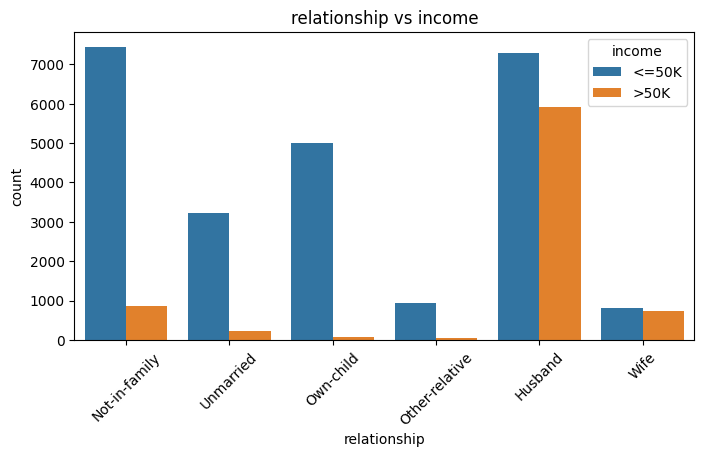

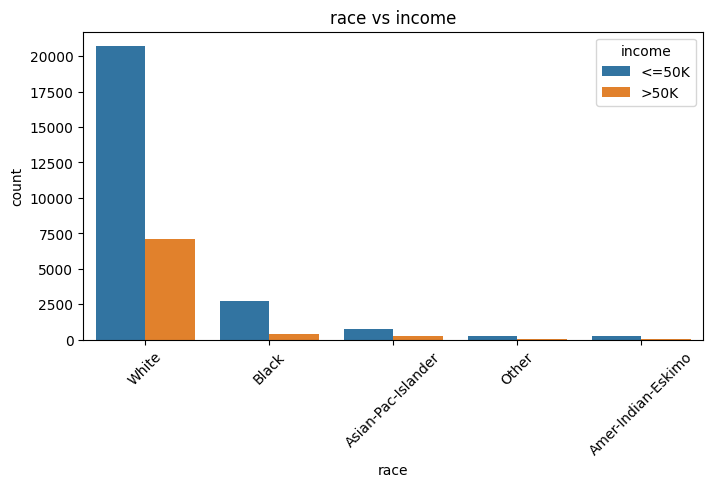

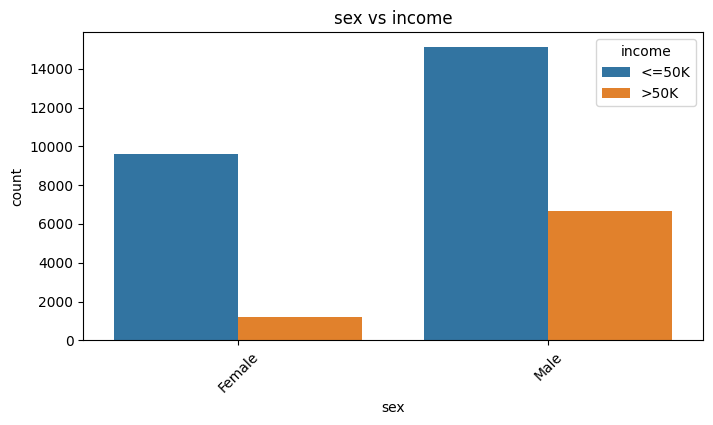

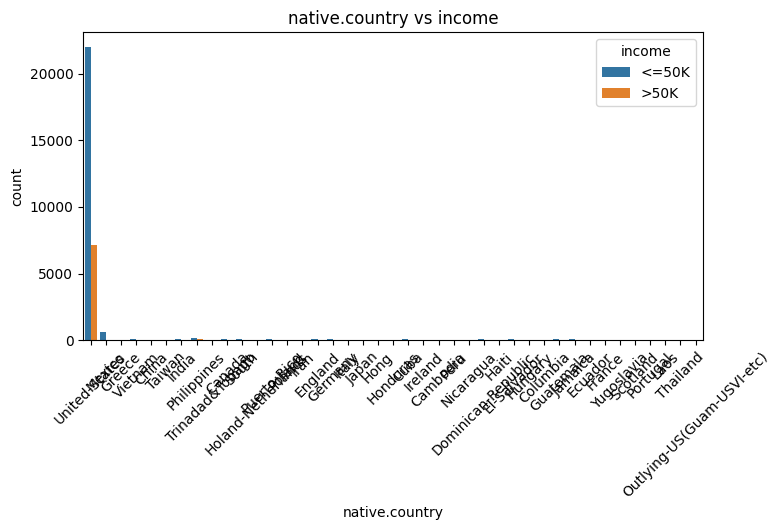

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ["age", "fnlwgt", "education.num", "capital.gain", "capital.loss", "hours.per.week"]


categorical_cols = [
    "workclass", "education", "marital.status", "occupation",
    "relationship", "race", "sex", "native.country"
]

# ---------- Numeric Features ----------
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue="income", kde=True)
    plt.title(f"{col} vs income")
    plt.show()

# ---------- Categorical Features ----------
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue="income", data=df)
    plt.title(f"{col} vs income")
    plt.xticks(rotation=45)
    plt.show()

# Data Cleaning

## Handling Missing values

In [ ]:
df["workclass"] = df["workclass"].fillna("Unknown")
df["occupation"] = df["occupation"].fillna("Unknown")

In [ ]:
df = df.dropna(subset=["native.country"])

## Handling irrelevant columns

In [ ]:
df["native.country"].value_counts()

,count
native.country,
United-States,29170
Mexico,643
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100
Cuba,95


fnlwgt - It’s a sampling weight used by the census, not a personal attribute. So We can drop it.

Very few unique countries matter; mostly “United-States”. Can drop if <2% variety.

In [ ]:
df = df.drop(columns=["fnlwgt", "native.country"], errors='ignore')

In [ ]:
print("Remaining columns:", df.columns.tolist())

Remaining columns: ['age', 'workclass', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'income']


In [ ]:
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,Unknown,HS-grad,9,Widowed,Unknown,Not-in-family,White,Female,0,4356,40,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,<=50K
2,66,Unknown,Some-college,10,Widowed,Unknown,Unmarried,Black,Female,0,4356,40,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,<=50K


## Handle inconsistencies

In [ ]:
df["workclass"].value_counts()

,count
workclass,
Private,22286
Self-emp-not-inc,2499
Local-gov,2067
Unknown,1809
State-gov,1279
Self-emp-inc,1074
Federal-gov,943
Without-pay,14
Never-worked,7


In [ ]:
df['workclass'] = df['workclass'].replace({
    'Self-emp-not-inc': 'self-employed',
    'Self-emp-inc': 'self-employed',
    'Without-pay': 'other',
    'Never-worked': 'other'
})

In [ ]:
df["marital.status"].value_counts()

,count
marital.status,
Married-civ-spouse,14692
Never-married,10488
Divorced,4394
Separated,1005
Widowed,979
Married-spouse-absent,397
Married-AF-spouse,23


In [ ]:
df['marital.status'] = df['marital.status'].replace({
    'Married-AF-spouse': 'Married',
    'Married-spouse-absent': 'Married',
    'Married-civ-spouse': 'Married'
})

# Feature Engineering

In [ ]:
df["capital_net"] = df["capital.gain"] - df["capital.loss"]

In [ ]:
def simplify_education(x):
    if x in ['preschool', '1st-4th', '5th-6th', '7th-8th']:
        return 'primary'
    elif x in ['9th', '10th', '11th', '12th', 'hs-grad']:
        return 'secondary'
    elif x in ['some-college', 'assoc-acdm', 'assoc-voc']:
        return 'college'
    else:
        return 'graduate'

df["education_simplified"] = df["education"].apply(simplify_education)

In [ ]:
df = df.drop(columns=["capital.gain", "capital.loss", "education"])

In [ ]:
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,income,capital_net,education_simplified
0,90,Unknown,9,Widowed,Unknown,Not-in-family,White,Female,40,<=50K,-4356,graduate
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,<=50K,-4356,graduate
2,66,Unknown,10,Widowed,Unknown,Unmarried,Black,Female,40,<=50K,-4356,graduate
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,<=50K,-3900,primary
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,<=50K,-3900,graduate


In [ ]:
df["marital.status"].value_counts()

,count
marital.status,
Married,15112
Never-married,10488
Divorced,4394
Separated,1005
Widowed,979


In [ ]:
df["relationship"].value_counts()

,count
relationship,
Husband,12947
Not-in-family,8156
Own-child,5005
Unmarried,3384
Wife,1534
Other-relative,952


# Feature encoding



In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["income"] = le.fit_transform(df["income"])

In [ ]:
# Select categorical columns for one-hot encoding, excluding the target variable 'income'
categorical_cols = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'education_simplified']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


display(df_encoded.head())

,age,education.num,hours.per.week,income,capital_net,workclass_Local-gov,workclass_Private,workclass_State-gov,workclass_Unknown,workclass_other,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,education_simplified_primary,education_simplified_secondary
0,90,9,40,0,-4356,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
1,82,9,18,0,-4356,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,66,10,40,0,-4356,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False
3,54,4,40,0,-3900,False,True,False,False,False,...,False,True,False,False,False,False,True,False,True,False
4,41,10,40,0,-3900,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False


# Handling Imbalance Classes

In [ ]:
df_encoded["income"].value_counts()

,count
income,
0,24283
1,7695


# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_scale = ["age", "education.num", "hours.per.week", "capital_net"]
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])

In [ ]:
df_encoded

,age,education.num,hours.per.week,income,capital_net,workclass_Local-gov,workclass_Private,workclass_State-gov,workclass_Unknown,workclass_other,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,education_simplified_primary,education_simplified_secondary
0,3.763831,-0.418349,-0.033847,0,-0.728424,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
1,3.178260,-0.418349,-1.815932,0,-0.728424,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,2.007117,-0.027820,-0.033847,0,-0.728424,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False
3,1.128760,-2.370996,-0.033847,0,-0.666147,False,True,False,False,False,...,False,True,False,False,False,False,True,False,True,False
4,0.177207,-0.027820,-0.033847,0,-0.666147,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.213525,-0.027820,-0.033847,0,-0.133516,False,True,False,False,False,...,False,False,False,False,False,False,True,True,False,False
32557,-0.847543,0.753239,-0.195855,0,-0.133516,False,True,False,False,False,...,False,False,True,False,False,False,True,False,False,False
32558,0.104010,-0.418349,-0.033847,1,-0.133516,False,True,False,False,False,...,False,False,False,False,False,False,True,True,False,False
32559,1.421546,-0.418349,-0.033847,0,-0.133516,False,True,False,False,False,...,False,True,False,False,False,False,True,False,False,False


# Feature Selection

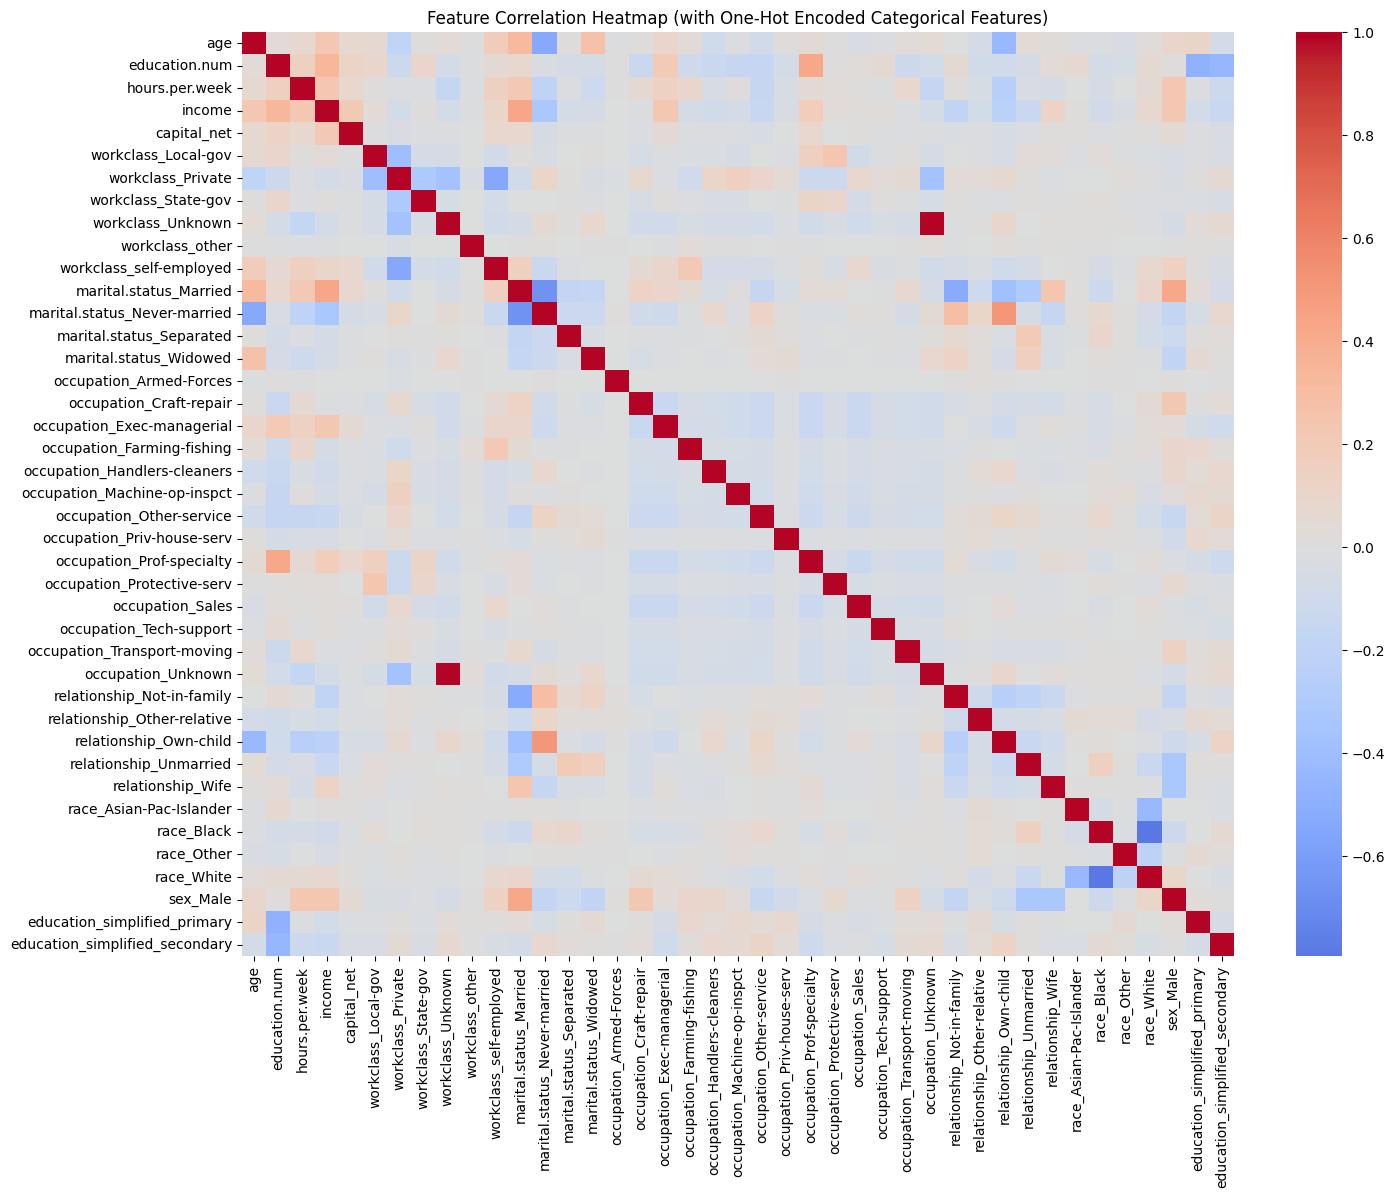

In [ ]:
# Calculate the correlation matrix on the encoded dataframe
correlation_matrix = df_encoded.corr()

# Display the correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap (with One-Hot Encoded Categorical Features)")
plt.show()

In [ ]:
df_encoded = df_encoded.drop(columns=["occupation_Unknown"])

# Train_test Split for imbalance dataset

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("income", axis =1)
y = df_encoded["income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True, class_weight='balanced'),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate
results = []
fitted_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    fitted_models[name] = model
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob) if y_prob is not None else 0

    results.append([name, acc, prec, rec, f1, roc])

# Display results
import pandas as pd
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])
results_df = results_df.sort_values(by="ROC-AUC", ascending=False).reset_index(drop=True)

print(results_df)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:21:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                    Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0                 XGBoost  0.872420   0.783975  0.648473  0.709815  0.925060
1       Gradient Boosting  0.865385   0.789744  0.600390  0.682171  0.921205
2                AdaBoost  0.851782   0.740831  0.590643  0.657267  0.906427
3  Support Vector Machine  0.810819   0.570450  0.865497  0.687661  0.905878
4     Logistic Regression  0.805503   0.565007  0.833008  0.673319  0.901633
5           Random Forest  0.840213   0.681914  0.629630  0.654730  0.889453
6             Naive Bayes  0.667292   0.413813  0.918778  0.570621  0.876456
7     K-Nearest Neighbors  0.832239   0.678955  0.574399  0.622316  0.852928
8           Decision Tree  0.812695   0.599533  0.667316  0.631611  0.771715


In [ ]:
fitted_models

{'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
 'K-Nearest Neighbors': KNeighborsClassifier(),
 'Support Vector Machine': SVC(class_weight='balanced', probability=True),
 'Naive Bayes': GaussianNB(),
 'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
 'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
 'Gradient Boosting': GradientBoostingClassifier(random_state=42),
 'AdaBoost': AdaBoostClassifier(random_state=42),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, feature_weights=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=Non

In [ ]:
top3 = results_df.head(3)["Model"].tolist()
print("\nTop 3 models:", top3)


Top 3 models: ['XGBoost', 'Gradient Boosting', 'AdaBoost']


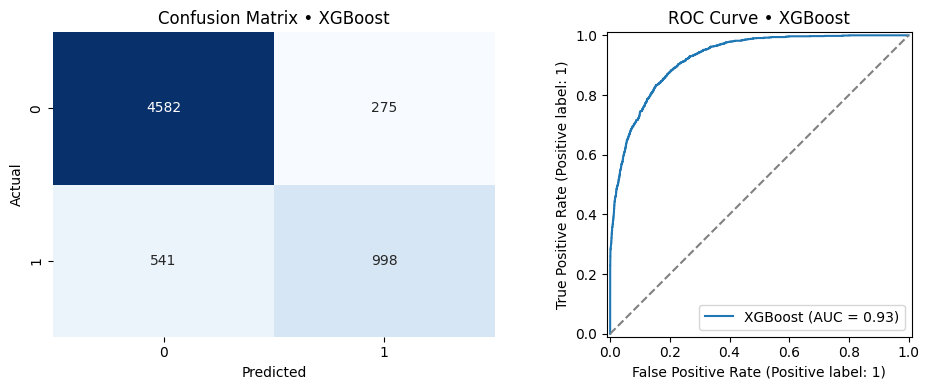

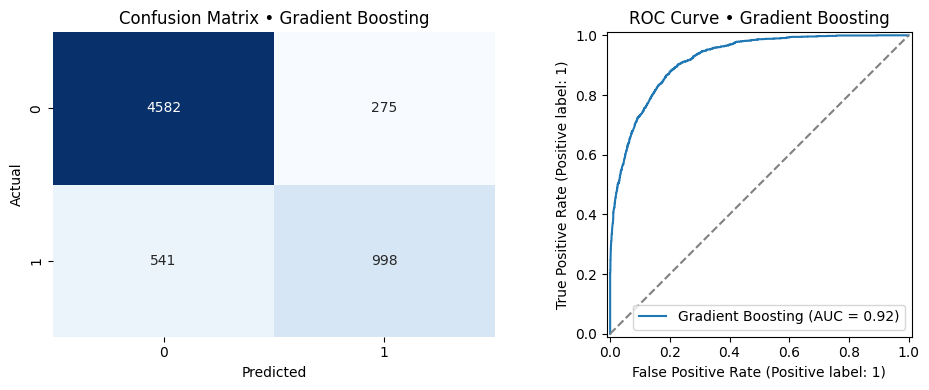

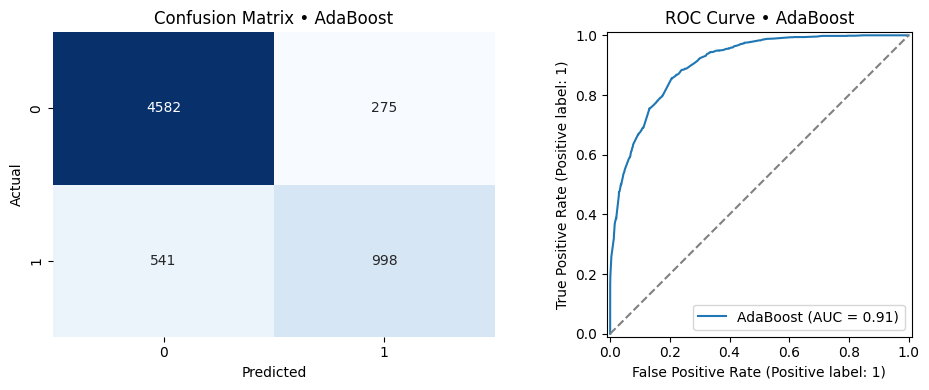

In [ ]:
for name in top3:
    mdl = fitted_models[name]
    y_pred = model.predict(X_test)
    y_score = mdl.predict_proba(X_test)[:, 1] if hasattr(mdl, "predict_proba") else mdl.decision_function(X_test)

        # Create subplots: 1 row, 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # ---- 1️⃣ Confusion Matrix ----
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
    axes[0].set_title(f"Confusion Matrix • {name}")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")

    # ---- 2️⃣ ROC Curve ----
    RocCurveDisplay.from_predictions(y_test, y_score, name=name, ax=axes[1])
    axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
    axes[1].set_title(f"ROC Curve • {name}")

    plt.tight_layout()
    plt.show()